# Prolog

In [1]:
import pandas as pd
import seaborn as sb
import mplcursors
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, interact, ToggleButton

## The interactive matplotlib widget uses the ipympl (https://matplotlib.org/ipympl/) backend by default.
## The backend may be installed via:
## `pip install ipympl`

In [2]:
# Load the data from a JSON file produced from the submissions
# This load is significantly faster than parsing the submission sheets
df = pd.read_json("data.json")

# all available data
df.columns

Index(['CPU Family', 'CPU Generation', 'CPU Model', 'CPU Submodel',
       'Contributor Affiliation', 'Contributor ID',
       'Core-Time-To-Solution [h]', 'Decomposition Method',
       'Energy per Iteration [J]', 'Energy per Iteration [kJ]',
       'Energy-To-Solution [kWh]', 'FVOPS', 'FVOPS per Energy',
       'FVOPS per Energy per Iteration', 'FVOPS per Node', 'File Name',
       'GPU Model', 'Is Energy Reported', 'Is Partial', 'Last-Level Cache',
       'Mesh', 'Network Interconnect', 'Node-Time-To-Solution [h]',
       'Number of CPU Cores', 'Number of Cells', 'Number of GPU Devices',
       'Number of Nodes', 'OpenFOAM Flavor',
       'Pre-Processing Wall-Clock Time [s]', 'Renumbering Method',
       'Run Consumed Energy [kWh]', 'Run Wall-Clock Time [s]',
       'Software Optimization Category', 'Storage File-System',
       'System TDP [W]', 'Time per Iteration [s]', 'Time-To-Solution [h]',
       'Total Core Time [s]', 'Total Node Time [s]', 'Track'],
      dtype='object')

In [3]:
# an example how to filter / select a specific subset of the data
# here only keep fine mesh
# df = df[df["Mesh"] == "fine"]

# Plot Examples

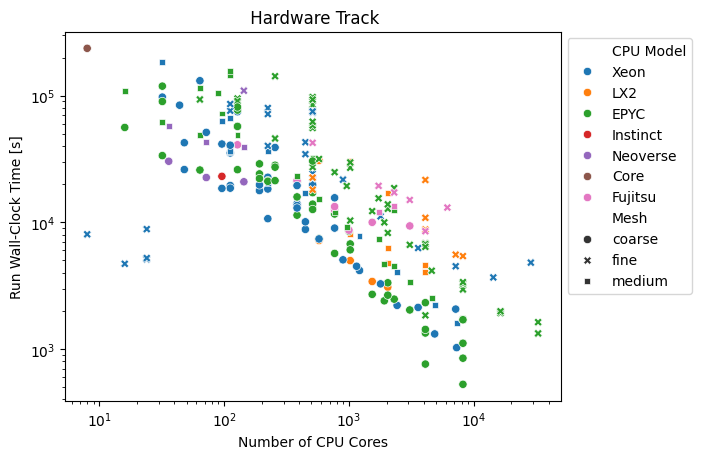

In [4]:
ax = sb.scatterplot(df,x="Number of CPU Cores", y="Run Wall-Clock Time [s]", hue="CPU Model", style="Mesh")
ax.set(xscale="log", yscale="log", title=" Hardware Track")
sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
fig = ax.get_figure()

<Axes: xlabel='Energy per Iteration [J]', ylabel='CPU Model'>

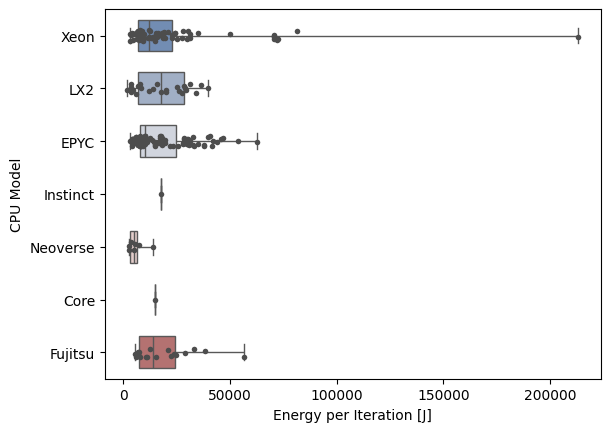

In [5]:
sb.boxplot(
    df, x="Energy per Iteration [J]", y="CPU Model", hue="CPU Model",
    whis=[0, 100], width=.6, palette="vlag"
)
sb.stripplot(df, x="Energy per Iteration [J]", y="CPU Model", size=4, color=".3")

# Interactive scatter with annotations

In [6]:
%matplotlib ipympl
# %matplotlib widget  # use this if ipympl is not available

In [7]:
def show_annotation(sel):
    row = df.iloc[sel.index]  # selected row from the dataframe
    sel.annotation.set_text(f"""
CPU: {row['CPU Model']}-{row['CPU Submodel']}
Last-Level Cache: {row['Last-Level Cache']}
Mesh: {row['Mesh']}
Track: {row['Track']}
Software Optimization Category: {row['Software Optimization Category']}
Number of CPU Cores: {row['Number of CPU Cores']}
Number of Nodes: {row['Number of Nodes']}
Time per Iteration: {row['Time per Iteration [s]']} [s]
Energy per Iteration: {row['Energy per Iteration [J]']} [J]
Contributor ID: {row['Contributor ID']}
""")
    sel.annotation.get_bbox_patch().set(fc="lightsalmon", alpha=0.9)

def draw_scatter(x,y,color,logX,logY):
    plt.clf()
    g = sb.scatterplot(df,x=x, y=y, hue=color)
    cursor = mplcursors.cursor([ax.collections[0] for ax in [g]], hover=mplcursors.HoverMode.Transient)
    cursor.connect("add", show_annotation)
    if logX:
        g.set(xscale="log")
    if logY:
        g.set(yscale="log")
    plt.show()

dd1 = Dropdown(options=df.columns, value='Energy-To-Solution [kWh]', description='X-Axis: ')
dd2 = Dropdown(options=df.columns, value='Time-To-Solution [h]', description='Y-Axis: ')
dd3 = Dropdown(options=df.columns, value='Track', description='Color: ')
logX = ToggleButton(value=True, description='Log x-scale')
logY = ToggleButton(value=True, description='Log y-scale')

interact(draw_scatter, x=dd1, y=dd2, color=dd3, logX=logX, logY=logY)

interactive(children=(Dropdown(description='X-Axis: ', index=10, options=('CPU Family', 'CPU Generation', 'CPU…

<function __main__.draw_scatter(x, y, color, logX, logY)>